## Visualização de Dados com Seaborn

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.0


## Statistical Data Visualization com Seaborn 

https://seaborn.pydata.org/

In [3]:
!pip install -q seaborn==0.12.2


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Imports
import random
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sea
sea.__version__

'0.12.2'

## Criando Gráficos com Seaborn

In [6]:
# Carregando um dos datasets que vem com o Seaborn
dados = sea.load_dataset("tips")

In [7]:
dados.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


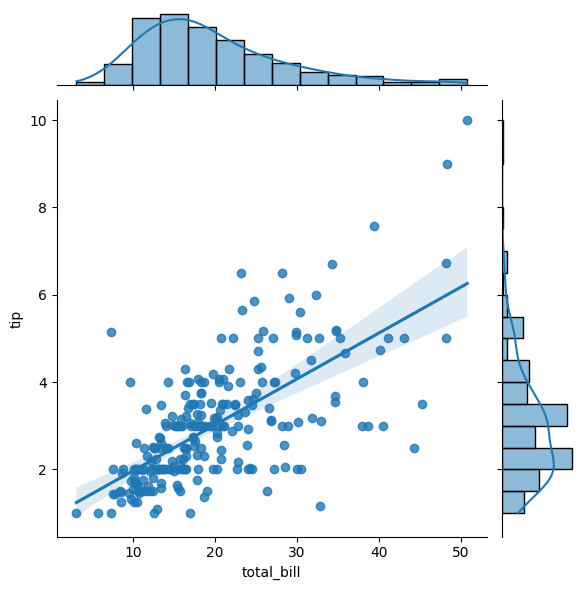

In [8]:
# O método joinplot cria plot de 2 variáveis com gráficos bivariados e univariados
sea.jointplot(
    data = dados, # Definindo Dataframe que deve ser usado no gráfico 
    x = "total_bill",  # Definindo qual coluna deve-se conisderar para eixo x
    y = "tip", # Definindo qual coluna deve-se conisderar para eixo y
    kind = 'reg' # Definindo o tipo
    )

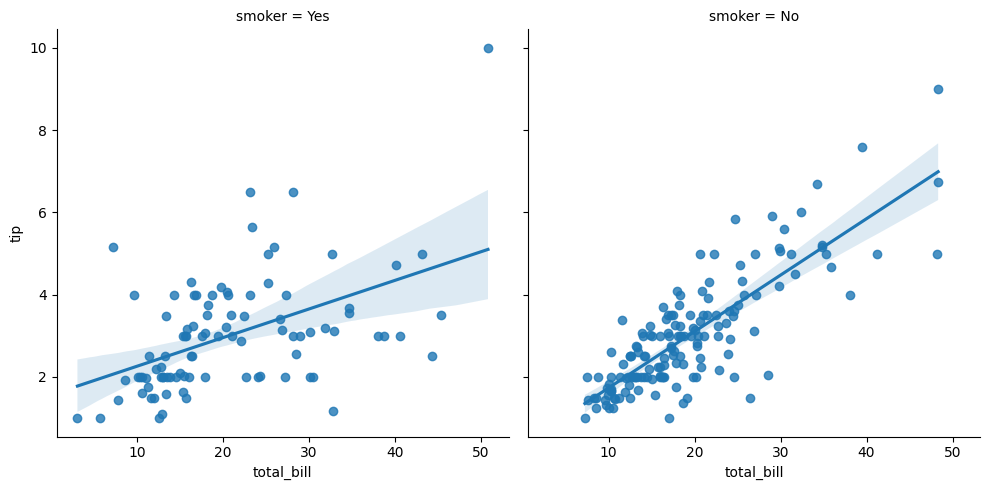

In [9]:
# O método lmplot() cria plot com dados e modelos de regressão
sea.lmplot(
    data = dados,
    x = "total_bill", 
    y = "tip", 
    col = "smoker" # Modelo de linha de tedencia
    )

In [10]:
# Construindo um dataframe com Pandas
df = pd.DataFrame()

In [11]:
# Alimentando o Dataframe com valores aleatórios
df['idade'] = random.sample(range(20, 100), 30)
df['peso'] = random.sample(range(55, 150), 30)

In [12]:
df.shape

(30, 2)

In [13]:
df.head()

,idade,peso
0,20,126
1,62,144
2,60,119
3,35,105
4,81,118


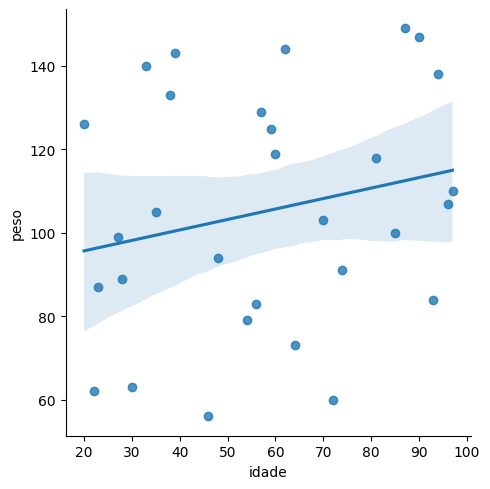

In [14]:
# lmplot
sea.lmplot(
    data = df,
    x = "idade",
    y = "peso",
    fit_reg = True
    )

<Axes: xlabel='idade', ylabel='Density'>

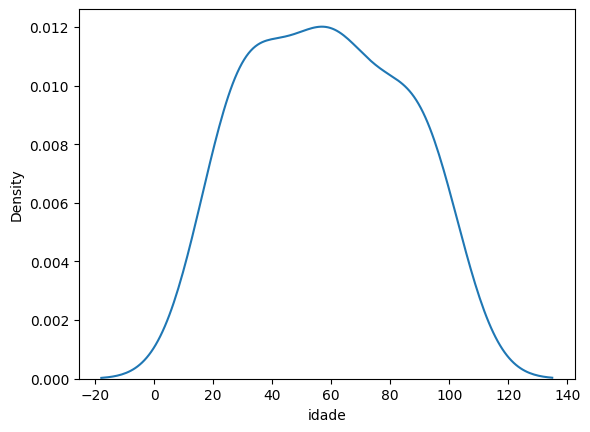

In [15]:
# kdeplot
sea.kdeplot(df.idade)

<Axes: xlabel='peso', ylabel='Density'>

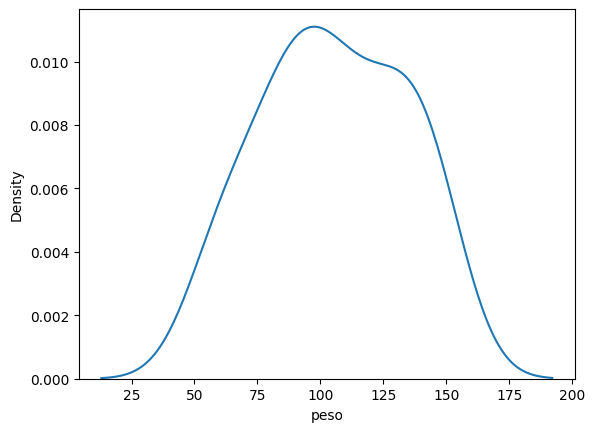

In [16]:
# kdeplot
sea.kdeplot(df.peso)

<Axes: xlabel='peso', ylabel='Density'>

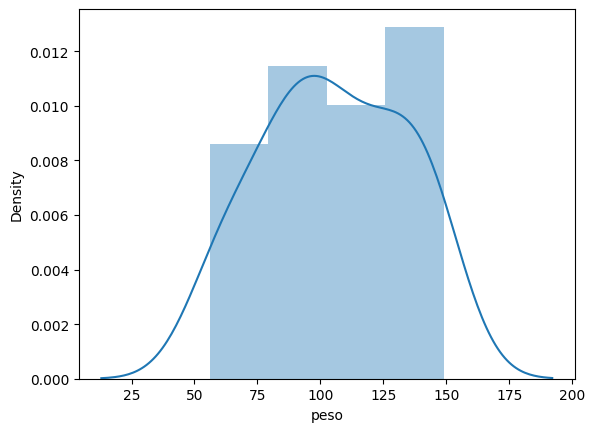

In [17]:
# distplot
sea.distplot(df.peso)

<Axes: xlabel='idade'>

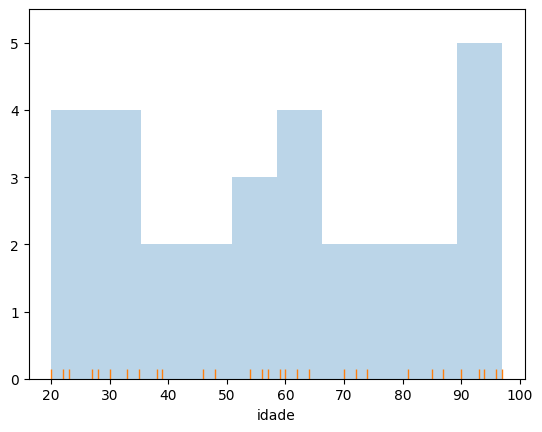

In [18]:
# Histograma
plt.hist(df.idade, alpha = .3)
sea.rugplot(df.idade)

<Axes: >

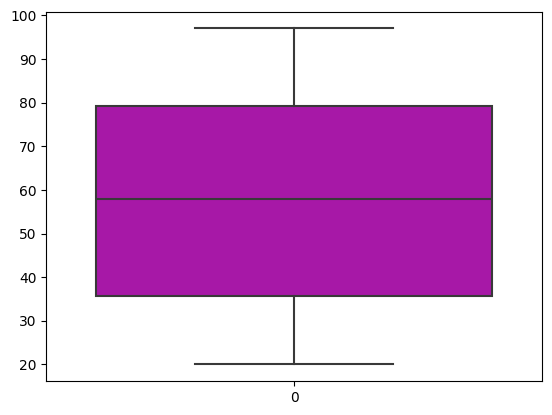

In [19]:
# Box Plot
sea.boxplot(df.idade, color = 'm')

<Axes: >

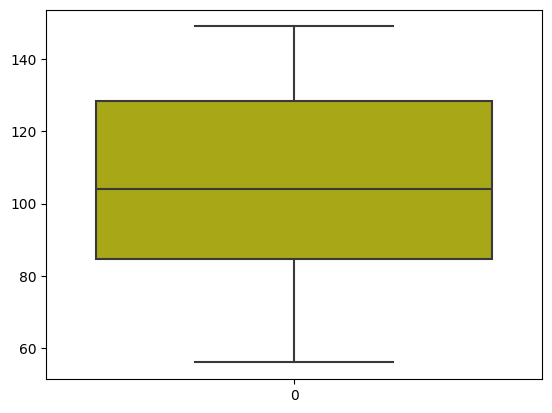

In [20]:
# Box Plot
sea.boxplot(df.peso, color = 'y')

<Axes: >

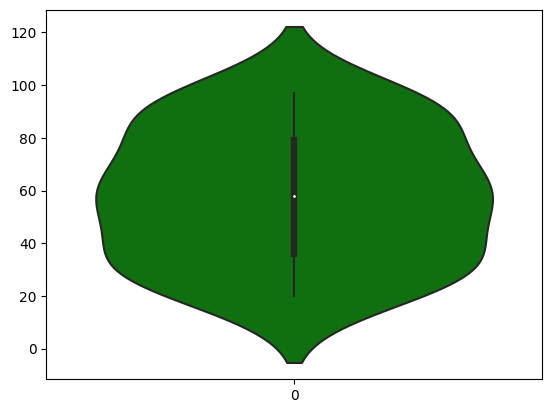

In [21]:
# Violin Plot
sea.violinplot(df.idade, color = 'g')

<Axes: >

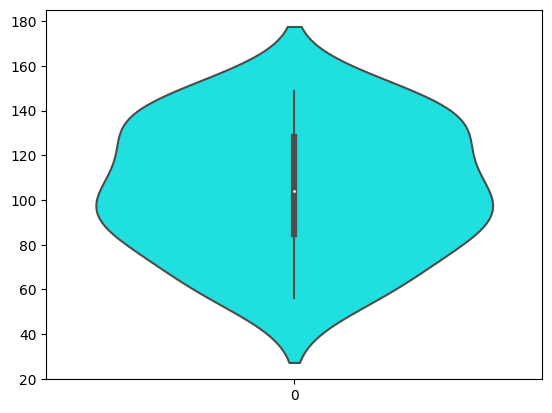

In [22]:
# Violin Plot
sea.violinplot(df.peso, color = 'cyan')

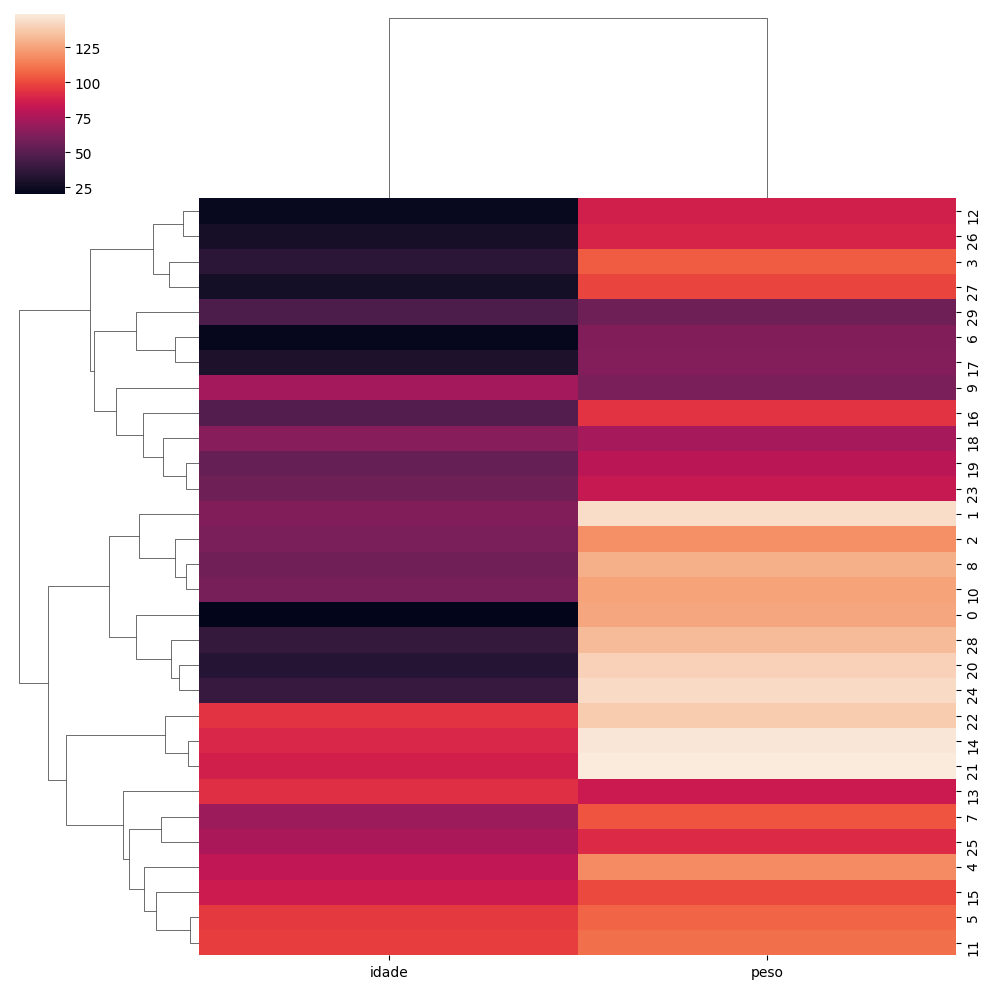

In [23]:
# Clustermap
sea.clustermap(df)

## Usando Matplotlib, Seaborn, NumPy e Pandas na Criação de Gráfico Estatístico

In [24]:
# Valores randômicos
np.random.seed(42)
n = 1000
pct_smokers = 0.2

# Variáveis
flag_fumante = np.random.rand(n) < pct_smokers
idade = np.random.normal(40, 10, n)
altura = np.random.normal(170, 10, n)
peso = np.random.normal(70, 10, n)

# Dataframe
dados = pd.DataFrame({'altura': altura, 'peso': peso, 'flag_fumante': flag_fumante})

# Cria os dados para a variável flag_fumante
dados['flag_fumante'] = dados['flag_fumante'].map({True: 'Fumante', False: 'Não Fumante'})

In [25]:
dados.shape

(1000, 3)

In [26]:
dados.head()

,altura,peso,flag_fumante
0,155.936825,78.745171,Não Fumante
1,169.168944,63.502348,Não Fumante
2,154.952796,57.967991,Não Fumante
3,177.600560,59.579556,Não Fumante
4,170.824398,65.127971,Fumante


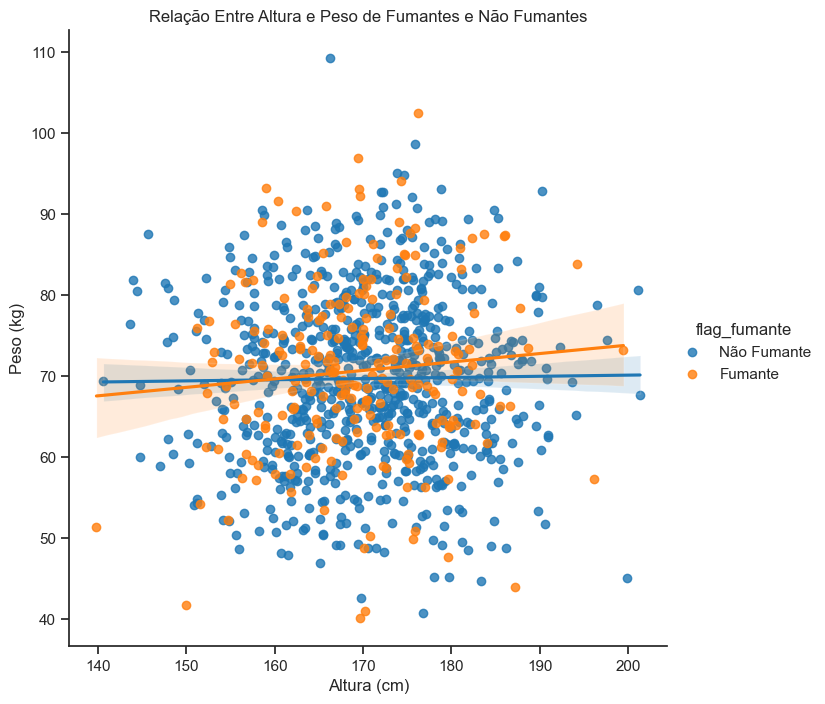

In [27]:
# Style
sea.set(style = "ticks")

# lmplot
sea.lmplot(x = 'altura', 
           y = 'peso', 
           data = dados, 
           hue = 'flag_fumante', 
           palette = ['tab:blue', 'tab:orange'], 
           height = 7)

# Labels e título
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.title('Relação Entre Altura e Peso de Fumantes e Não Fumantes')

# Remove as bordas
sea.despine()

# Show
plt.show()